# Sante : 

Pour comprendre comment les facteurs dans le domaine de la sant√© du pays asiatiques influencent le d√©veloppement durable et la qualit√© de vie ,Nous abordons plusieurs questions essentielles :

- Les d√©penses en sant√© contribuent-elles √† am√©liorer l'esp√©rance de vie ?  
- Quels sont les principaux facteurs qui influencent l'esp√©rance de vie dans les pays asiatiques ? 
- L'acc√®s √† l'eau potable et le niveau de d√©veloppement √©conomique influencent-ils le taux de mortalit√© infantile dans les pays asiatiques ?

L'esp√©rance de vie est un indicateur cl√© du d√©veloppement humain. Les d√©penses en sant√© sont souvent consid√©r√©es comme un levier majeur pour am√©liorer les soins de sant√©, r√©duire les maladies et, en fin de compte, prolonger la vie.  
**objectif** : Notre objectif est d'analyser si une augmentation des d√©penses en sant√© par habitant contribue r√©ellement √† am√©liorer l'esp√©rance de vie dans les pays asiatiques et d'examiner la nature de cette relation.

## 1- La r√©gression polynomiale :  
- **Question** : Les d√©penses en sant√© contribuent-elles √† am√©liorer l'esp√©rance de vie ?
### Indicateurs s√©lectionn√©s :  
- **D√©penses en sant√©**  : D√©penses annuelles en sant√© par habitant en dollars am√©ricains.  
- **Esp√©rance de vie**  : Dur√©e moyenne de vie √† la naissance.

### Hypoth√®se :
- **H‚ÇÄ**  : Les d√©penses en sant√© n'ont pas d'impact significatif sur l'esp√©rance de vie.  
- **H‚ÇÅ**  : Les d√©penses en sant√© ont un impact significatif sur l'esp√©rance de vie, avec une relation non lin√©aire.

Nous allons maintenant explorer si les donn√©es soutiennent l'id√©e que les d√©penses en sant√© sont un levier efficace pour augmenter l'esp√©rance de vie et si cette relation est sujette √† des limites.

In [7]:
import pandas as pd
# Charger les donn√©es nettoy√©es
data = pd.read_csv("data_cleaned.csv")

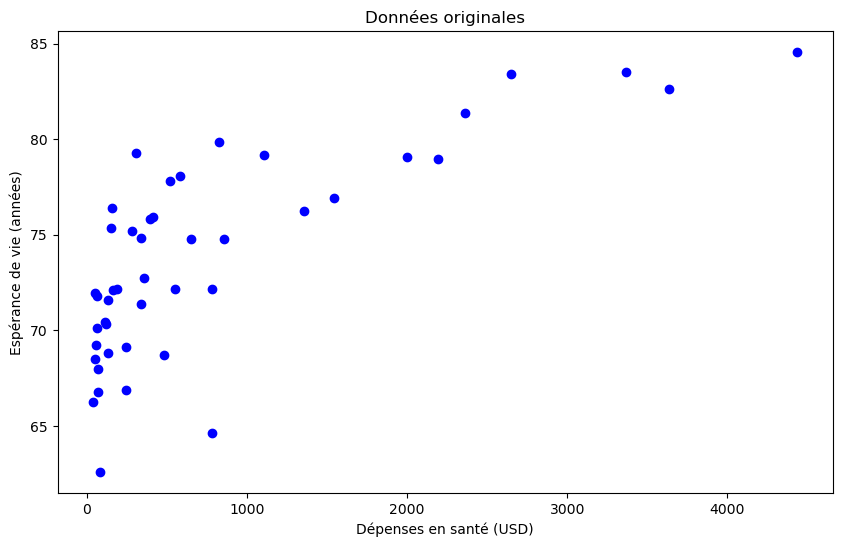

In [9]:

import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Charger les donn√©es nettoy√©es
data = pd.read_csv('data_cleaned.csv')
X = data[['Depenses_en_sante_par_habitant']].values
y = data['Esperance_de_vie'].values

plt.figure(figsize=(10, 6))

# V√©rifier la distribution des donn√©es
plt.scatter(X, y, color='blue', label='Donn√©es r√©elles')
plt.xlabel('D√©penses en sant√© (USD)')
plt.ylabel('Esp√©rance de vie (ann√©es)')
plt.title('Donn√©es originales')
plt.show()




### Remarque
- On observe une augmentation claire de l'esp√©rance de vie avec les d√©penses en sant√©. Cela confirme qu'il existe une relation positive entre les deux variables.
- Les d√©penses en sant√© peuvent avoir un impact significatif sur l'esp√©rance de vie jusqu'√† un certain seuil, surtout dans des pays o√π les services de base sont d√©j√† bien couverts l'augmantation des d√©penses en sant√©  peut avoir un effet limit√© , donc apr√®s quoi cet effet pourrait diminuer ?
- La r√©gression lin√©aire simple pourrait ne pas capturer la complexit√© de cette relation.  
- Une r√©gression polynomiale permet de mod√©liser cette relation avec une courbe, en ajustant le mod√®le √† une forme quadratique ou d'un degr√© sup√©rieur.  


In [12]:
# Normaliser les donn√©es
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les donn√©es en ensembles d'entra√Ænement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**rappel** :   
==> Normaliser les donn√©es :  pour garantir la qualit√© et la validit√© de l'analyse.  
La normalisation met les variables sur une √©chelle similaire, souvent en leur donnant une moyenne de 0 et un √©cart type de 1.  
La normalisation assure que toutes les caract√©ristiques ont la m√™me importance initiale et emp√™che les variables avec des √©chelles plus grandes de dominer les calculs.  
==> Diviser les donn√©es en ensembles d'entra√Ænement:  but de mesurer la performance r√©elle du mod√®le et de s'assurer qu'il est capable de g√©n√©raliser √† de nouvelles donn√©es, et non seulement de bien s'adapter aux donn√©es d'entra√Ænement.  
Pr√©venir le surapprentissage Lorsque vous entra√Ænez un mod√®le sur toutes vos donn√©es, il peut "m√©moriser" les sp√©cificit√©s des donn√©es d'entra√Ænement plut√¥t que d'apprendre les relations sous-jacentes.  
√âvaluer la g√©n√©ralisation La performance sur l'ensemble d'entra√Ænement mesure √† quel point le mod√®le est bien ajust√© aux donn√©es qu'il a vues. et La performance sur l'ensemble de test mesure sa capacit√© √† g√©n√©raliser. Une grande diff√©rence entre les deux performances indique que le mod√®le est sur-ajust√©.  
==> Un mod√®le sur-ajust√© est "trop sp√©cialis√©" dans les donn√©es d'entra√Ænement et perd sa capacit√© √† g√©n√©raliser. 

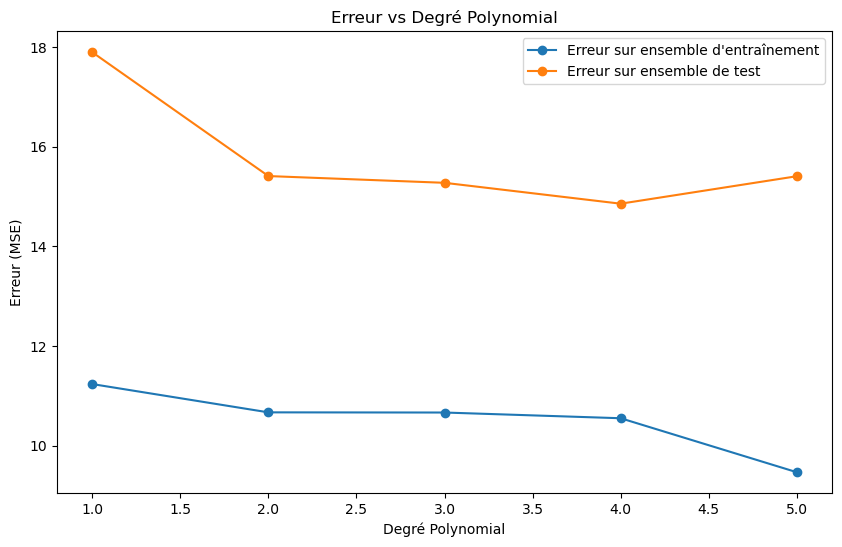

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Tester diff√©rents degr√©s
degrees = range(1, 6)
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Visualiser les erreurs
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erreur sur ensemble d\'entra√Ænement', marker='o')
plt.plot(degrees, test_errors, label='Erreur sur ensemble de test', marker='o')
plt.title('Erreur vs Degr√© Polynomial')
plt.xlabel('Degr√© Polynomial')
plt.ylabel('Erreur (MSE)')
plt.legend()
plt.show()


**Remarque** :
- Courbe d'erreur sur l'ensemble d'entra√Ænement (ligne bleue) :  
On observe une diminution continue de l'erreur (MSE) √† mesure que le degr√© polynomial augmente. Cela est attendu, car des mod√®les plus complexes
 s'ajustent mieux aux donn√©es d'entra√Ænement, capturant plus de d√©tails.  
  
- Courbe d'erreur sur l'ensemble de test (ligne orange) :  
L'erreur diminue initialement jusqu'√† un certain degr√© (autour de 3 ou 4) puis commence √† augmenter √† nouveau pour un degr√© sup√©rieur . Cette augmentation de l'erreur sur les donn√©es de test, malgr√© une erreur r√©duite sur les donn√©es d'entra√Ænement, est un signe typique de sur-apprentissage (overfitting).  
  
- Point critique :  
Le degr√© optimal est celui o√π l'erreur sur l'ensemble de test est minimale sans augmenter de mani√®re significative l'erreur sur l'ensemble d'entra√Ænement. Ici, le degr√© 3 semble √™tre un bon compromis.

===>  un mod√®le polynomial de degr√© 3. Ce choix permet de capturer la non-lin√©arit√© de la relation entre les d√©penses en sant√© et l'esp√©rance de vie tout en minimisant le risque de sur-apprentissage.

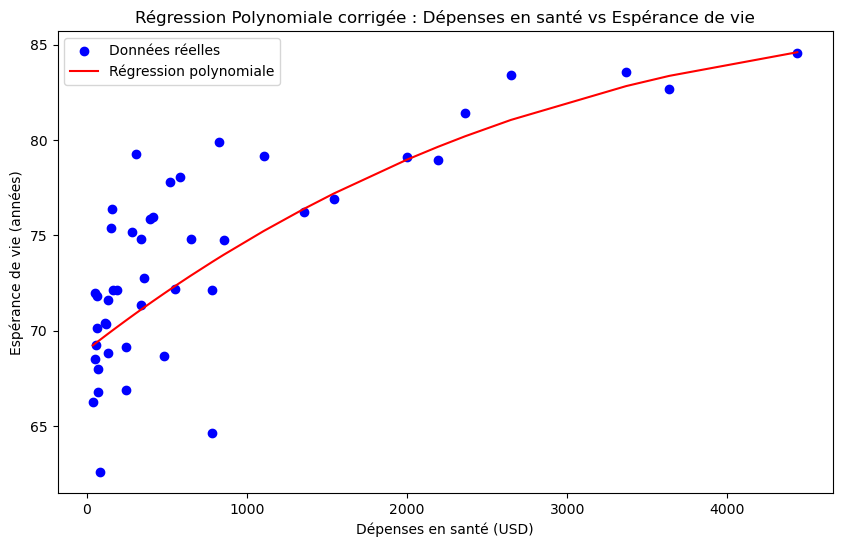

R¬≤ (entra√Ænement) : 0.6436


In [18]:


# Appliquer la transformation polynomiale (degr√© 3)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Cr√©er et ajuster le mod√®le de r√©gression polynomiale
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Pr√©dictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Visualisation des r√©sultats
plt.figure(figsize=(10, 6))

# Inverser la normalisation pour afficher les axes dans leur unit√© originale
X_original = scaler.inverse_transform(X_scaled)

# Trier les points pour une courbe plus lisse
sorted_indices = np.argsort(X_original.flatten())
X_sorted = X_original[sorted_indices]
y_pred_sorted = model.predict(poly.transform(scaler.transform(X_sorted)))

plt.scatter(X_original, y, color='blue', label='Donn√©es r√©elles')  # Donn√©es r√©elles
plt.plot(X_sorted, y_pred_sorted, color='red', label='R√©gression polynomiale')  # Courbe ajust√©e

plt.title('R√©gression Polynomiale  : D√©penses en sant√© vs Esp√©rance de vie')
plt.xlabel('D√©penses en sant√© (USD)')
plt.ylabel('Esp√©rance de vie (ann√©es)')
plt.legend()
plt.show()

from sklearn.metrics import r2_score

# Calcul des r√©sidus sur l'ensemble d'entra√Ænement
residuals = y_train - y_pred_train
std_dev = np.std(residuals)

# Calcul de R^2 pour les ensembles d'entra√Ænement 
r2_train = r2_score(y_train, y_pred_train)


print(f"R¬≤ (entra√Ænement) : {r2_train:.4f}")


**Remarque** :  
- Les points bleus (les donn√©es r√©elles) sont globalement bien align√©s avec la courbe rouge (mod√®le polynomial), ce qui montre une bonne ad√©quation. Cependant, il y a une certaine dispersion .
- Lorsque les d√©penses en sant√© sont faibles (0 √† environ 1500 USD par habitant), l'impact sur l'esp√©rance de vie est plus marqu√©. Cela sugg√®re que les investissements dans des syst√®mes de sant√© de base ont un effet majeur sur l'am√©lioration de la qualit√© de vie.
- Dans la zone o√π les d√©penses d√©passent 2000 USD, les gains en esp√©rance de vie sont plus modestes, atteignant une sorte de plateau. avec un pont faible .

**Interpretation** :
- Dans les pays asiatiques avec de faibles d√©penses en sant√©, une augmentation de ces d√©penses peut consid√©rablement am√©liorer l'esp√©rance de vie.
- Le mod√®le polynomial montre une corr√©lation mod√©r√©e, avec un ùëÖ2=64% , ce qui indique que les d√©penses en sant√© expliquent une partie significative, mais non totale, de la variation de l‚Äôesp√©rance de vie.
- Dans les pays o√π les d√©penses sont d√©j√† √©lev√©es, les gains suppl√©mentaires en esp√©rance de vie sont limit√©s, soulignant la n√©cessit√© d'explorer d'autres leviers, comme l'am√©lioration des conditions environnementales ou l'√©ducation √† la sant√©.

- et donc  Pour d√©termine Quelles sont les principaux facteurs influen√ßant l‚Äôesp√©rance de vie dans les pays asiatiques ? , nous avons utilis√© une r√©gression Ridge. 
- L'objectif est donc d'identifier les variables explicatives les plus influentes sur l'esp√©rance de vie parmi un ensemble de facteurs, tout en contr√¥lant les √©ventuelles corr√©lations entre ces variables.

## 2- La R√©gression Ridge :  
- **Question** : Quelles sont les principaux facteurs influen√ßant l‚Äôesp√©rance de vie dans les pays asiatiques ?

### Indicateurs s√©lectionn√©s :  
- **Variable d√©pendante (Y) :**
   - Esp√©rance de vie √† la naissance.
- **Variables ind√©pendantes (X) :**
  - D√©penses en sant√© (USD).
  - Acc√®s √† l'√©lectricit√© (%).
  - Acc√®s √† l'eau potable (%).
  - Taux de pauvret√© (% vivant avec moins de 2,15 $/jour).

- nous devons identifier les autres facteurs susceptibles d'influencer l'esp√©rance de vie. Ces facteurs pourraient inclure des dimensions li√©es aux infrastructures, aux conditions socio-√©conomiques ou √† l'acc√®s aux ressources essentielles, comme l'eau potable ou l'√©lectricit√©.

In [22]:
import pandas as pd

# Chargement des donn√©es
data = pd.read_csv('data_cleaned.csv')

In [24]:
# S√©lection des variables
X = data[['Depenses_en_sante_par_habitant', 'Acces_electricite', 'Acces_eau_potable', 'Taux_pauvrete']]
y = data['Esperance_de_vie']

In [26]:
from sklearn.preprocessing import StandardScaler

# Normalisation des variables ind√©pendantes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# V√©rification apr√®s normalisation
print("Donn√©es normalis√©es (exemple) :", X_scaled[:5])


Donn√©es normalis√©es (exemple) : [[-6.76993075e-01  3.80125257e-02 -2.09426058e+00 -1.97154738e-16]
 [-2.23804654e-01  4.05703779e-01  7.60257182e-01 -7.16666988e-01]
 [-5.20670620e-01  4.05703779e-01  3.20210509e-01 -1.97154738e-16]
 [ 3.07791817e-01  4.05703779e-01  7.57599596e-01 -1.97154738e-16]
 [-7.05453706e-01 -2.01786118e-01  5.14893567e-01 -1.97154738e-16]]


==>  Normalisation des variables ind√©pendantes : 
- √âquilibrer l'impact de la r√©gularisation sur toutes les variables.
- Rendre les coefficients comparables.
- Pr√©server l'√©quit√© entre les variables, ind√©pendamment de leur √©chelle.

In [29]:
from sklearn.model_selection import train_test_split

# Division des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# V√©rification des dimensions
print("Dimensions de l'ensemble d'entra√Ænement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)


Dimensions de l'ensemble d'entra√Ænement : (36, 4)
Dimensions de l'ensemble de test : (9, 4)


In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du mod√®le Ridge
ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster alpha plus tard

# Entra√Ænement du mod√®le
ridge.fit(X_train, y_train)
# Pr√©dictions
y_pred = ridge.predict(X_test)


In [37]:
from sklearn.model_selection import GridSearchCV

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Validation crois√©e avec GridSearchCV
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

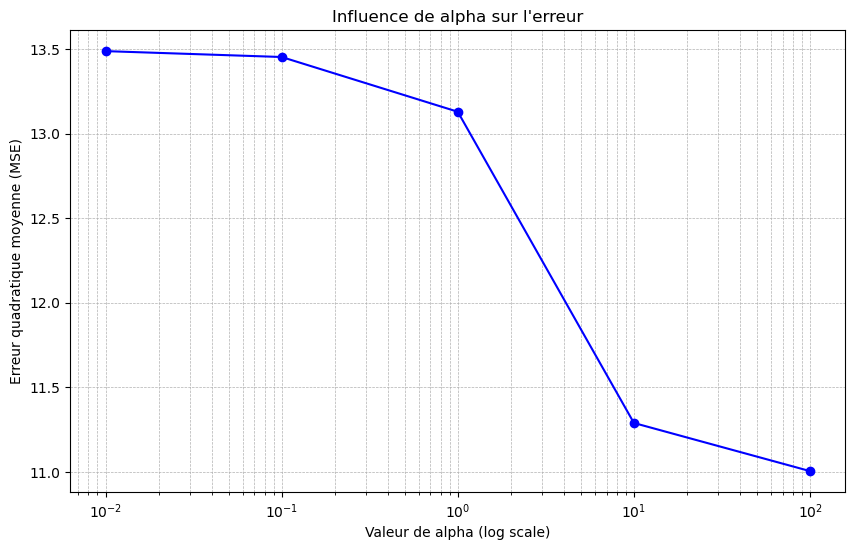

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Liste pour stocker les erreurs
errors = []

# Calcul des erreurs pour chaque alpha
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Tracer les erreurs
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, errors, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # √âchelle logarithmique pour mieux visualiser les valeurs d'alpha
plt.xlabel("Valeur de alpha (log scale)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Influence de alpha sur l'erreur")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

**Rappel** : 
- alpha est le param√®tre de r√©gularisation. Il contr√¥le la force de la p√©nalisation appliqu√©e aux coefficients du mod√®le. Cette r√©gularisation vise √† r√©duire le risque de sur-ajustement (overfitting) en imposant une contrainte sur la taille des coefficients.
- Lorsque alpha = 0, la r√©gression Ridge devient une r√©gression lin√©aire classique, sans r√©gularisation. Cela peut entra√Æner un sur-ajustement si les donn√©es sont bruyantes ou si le nombre de variables explicatives est √©lev√©.  
- Lorsque alpha est √©lev√©, le mod√®le p√©nalise davantage les grands coefficients, ce qui force certains coefficients √† se rapprocher de 0, sans pour autant les annuler compl√®tement.mais peut introduire un biais important (sous-ajustement).

In [47]:
# Meilleur alpha
best_alpha = 100
print(f"Meilleure valeur pour alpha : {best_alpha}")

# Entra√Ænement avec le meilleur alpha
ridge_optimized = Ridge(alpha=best_alpha)
ridge_optimized.fit(X_train, y_train)

# Pr√©dictions finales
y_pred_optimized = ridge_optimized.predict(X_test)

# Extraction des coefficients et de leur importance
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': ridge_optimized.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))

Meilleure valeur pour alpha : 100
                         Variable  Coefficient
0  Depenses_en_sante_par_habitant     1.087430
2               Acces_eau_potable     0.765961
1               Acces_electricite     0.450129
3                   Taux_pauvrete    -0.227270


- Les coefficients positifs indiquent des variables ayant une influence positive sur l‚Äôesp√©rance de vie. Plus le coefficient est √©lev√©, plus son influence est forte.
- Les coefficients n√©gatifs indiquent des variables ayant une influence n√©gative (ou inverse) sur l‚Äôesp√©rance de vie.
- Les coefficients proches de z√©ro sont fortement att√©nu√©s par la r√©gularisation Ridge, ce qui signifie que ces variables ne contribuent que tr√®s peu √† la pr√©diction.

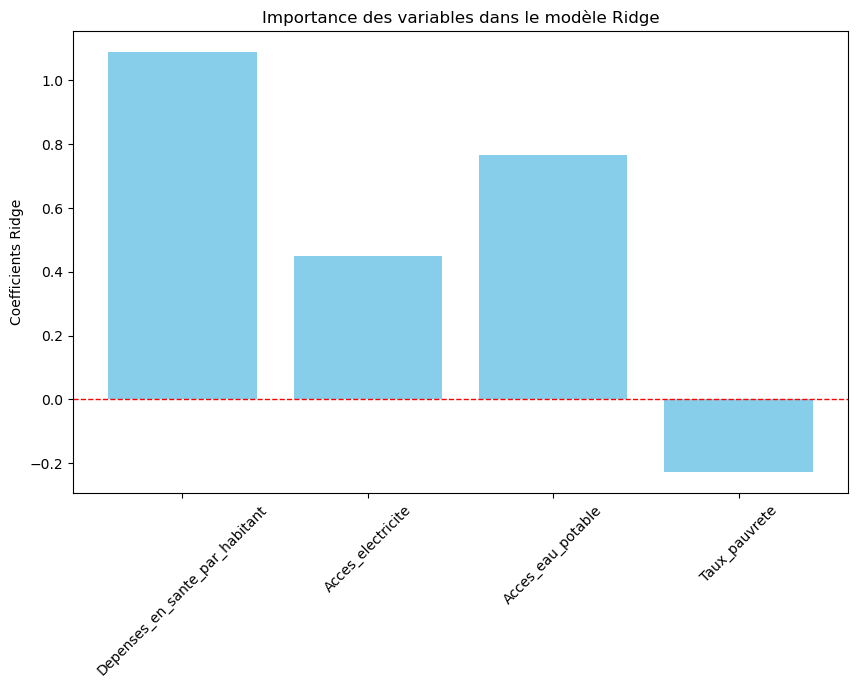

In [49]:
import matplotlib.pyplot as plt

# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ylabel("Coefficients Ridge")
plt.title("Importance des variables dans le mod√®le Ridge")
plt.xticks(rotation=45)
plt.show()

- le taux de pauvret√© :Comme pr√©vu, le taux de pauvret√© exerce une influence n√©gative sur l'esp√©rance de vie. Cela s'explique par le fait qu'un taux de pauvret√© √©lev√© limite l'acc√®s aux services essentiels tels que les soins de sant√©, l'eau potable et une nutrition ad√©quate. C

- D√©penses en sant√© par habitant :Les d√©penses en sant√© par habitant ont le coefficient le plus √©lev√© dans notre mod√®le. Cela confirme que des investissements plus importants dans les syst√®mes de sant√© se traduisent par une am√©lioration notable de l'esp√©rance de vie. Cela corrobore les conclusions de notre premi√®re analyse, en soulignant l'importance cruciale de ce facteur

- Acc√®s √† l'eau potable : Un meilleur acc√®s √† l'eau potable joue √©galement un r√¥le significatif. Cela est logique, car une meilleure disponibilit√© de l'eau potable favorise une meilleure hygi√®ne et r√©duit les maladies transmissibles, contribuant ainsi √† l'am√©lioration de la sant√© publique et, par cons√©quent, √† une esp√©rance de vie plus √©lev√©e

- Acc√®s √† l'√©lectricit√© : Bien que l'effet soit moins marqu√©, l'acc√®s √† l'√©lectricit√© a un impact positif sur l'esp√©rance de vie. Ce lien peut √™tre indirect, l'√©lectricit√© permettant d'am√©liorer les infrastructures, comme les h√¥pitaux, et les conditions de vie g√©n√©rales

**Conclusion** :
Ces r√©sultats montrent que plusieurs facteurs interagissent pour influencer l'esp√©rance de vie. Si les d√©penses en sant√© restent le levier le plus puissant, d'autres √©l√©ments, comme l'acc√®s √† l'eau potable et l'am√©lioration des conditions socio-√©conomiques, m√©ritent une attention particuli√®re. Cela justifie une approche multidimensionnelle pour am√©liorer durablement l'esp√©rance de vie dans les pays asiatiques.

## 3. ANOVA :  
**Question** :  
L'acc√®s √† l'eau potable et le niveau de d√©veloppement √©conomique influencent-ils le taux de mortalit√© infantile dans les pays asiatiques ? 

**Variable** :  
Variable d√©pendante (Y) : Taux_mortalite_infantile : Nombre de d√©c√®s pour 1 000 naissances vivantes.
Facteurs ind√©pendants (X) : Acces_eau_potable_categorise et Niveau_de_developpement
  
**Hypoth√®ses** :  
- Hypoth√®se nulle (H‚ÇÄ) :  
  Les moyennes des taux de mortalit√© infantile sont identiques entre les niveaux d'acc√®s √† l'eau potable.  
  Les moyennes des taux de mortalit√© infantile sont identiques entre les niveaux de d√©veloppement √©conomique.  
  Il¬†n‚Äôy¬†a¬†pas¬†d‚Äôinteraction¬†entre¬†les¬†deux¬†facteurs.  
    
- Hypoth√®se alternative (H‚ÇÅ) :    
  Les moyennes des taux de mortalit√© infantile diff√®rent entre les niveaux d'acc√®s √† l'eau potable.  
  Les moyennes des taux de mortalit√© infantile diff√®rent entre les niveaux de d√©veloppement √©conomique.  
  Il¬†existe¬†une¬†interaction¬†entre¬†les¬†deux¬†facteurs,¬†c‚Äôest-a-dire¬†que¬†l‚Äôeffet¬†d‚Äôun¬†facteur¬†depend¬†de¬†l‚Äôautre.  

In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Charger les donn√©es nettoy√©es
data = pd.read_csv("data_cleaned.csv")


# V√©rifier les cat√©gories
print("Distribution des cat√©gories d'acc√®s √† l'eau potable :")
print(data['Acces_eau_potable_categorise'].value_counts())
print("\nDistribution des cat√©gories de d√©veloppement √©conomique :")
print(data['Niveau_de_developpement'].value_counts())

Distribution des cat√©gories d'acc√®s √† l'eau potable :
Acces_eau_potable_categorise
√âlev√©     37
Mod√©r√©     5
Faible     3
Name: count, dtype: int64

Distribution des cat√©gories de d√©veloppement √©conomique :
Niveau_de_developpement
Interm√©diaire    18
Faible           14
√âlev√©            13
Name: count, dtype: int64


**Acces_eau_potable_categorise**:  
- √âlev√©: La majorit√© des pays asiatiques √©tudi√©s b√©n√©ficient d'un acc√®s √©lev√© √† l'eau potable
- Mod√©r√©: Ce groupe est sous-repr√©sent√©, ce qui peut limiter la robustesse des r√©sultats pour cette cat√©gorie.
- Faible: Tr√®s peu de pays sont dans cette cat√©gorie, ce qui pourrait influencer la validit√© statistique de cette comparaison.  
**Niveau de d√©veloppement √©conomique**:  
- √âlev√©: Les pays hautement d√©velopp√©s pourraient servir de r√©f√©rence pour √©valuer l'impact des infrastructures sur la mortalit√© infantile.
- Mod√©r√©: Cette cat√©gorie est la plus repr√©sent√©e, offrant des donn√©es potentiellement plus fiables pour cette comparaison.
- Faible: Ce groupe est bien repr√©sent√© et pourrait √™tre important pour comprendre les d√©fis des pays en d√©veloppement.  
**Probleme :**
- Le d√©s√©quilibre dans les effectifs des cat√©gories d'acc√®s √† l'eau potable (37 pour "√âlev√©", mais seulement 3 pour "Faible") peut affecter la puissance statistique de l'ANOVA.
Les r√©sultats pour les groupes "Mod√©r√©" et "Faible" pourraient √™tre moins fiables.

Pour que l'ANOVA soit fiable, elle suppose que les variances intragroupes soient homog√®nes, donc nous utilisons le test de Levene. Ce test permet de v√©rifier si les variances des diff√©rents groupes sont statistiquement √©gales.

In [47]:
from scipy.stats import levene
import pandas as pd

# Charger les donn√©es nettoy√©es
data = pd.read_csv("data_cleaned.csv")

# Filtrer les donn√©es n√©cessaires
anova_data = data[['Acces_eau_potable_categorise', 'Niveau_de_developpement', 'Taux_mortalite_infantile']].dropna()

# Grouper les donn√©es par les cat√©gories des deux facteurs
group1 = anova_data[anova_data['Acces_eau_potable_categorise'] == 'Faible']['Taux_mortalite_infantile']
group2 = anova_data[anova_data['Acces_eau_potable_categorise'] == 'Mod√©r√©']['Taux_mortalite_infantile']
group3 = anova_data[anova_data['Acces_eau_potable_categorise'] == '√âlev√©']['Taux_mortalite_infantile']

# Effectuer le test de Levene pour homog√©n√©it√© des variances
stat, p_value = levene(group1, group2, group3)

# R√©sultat du test
print("Statistique de Levene :", stat)
print("P-valeur :", p_value)

if p_value > 0.05:
    print("Les variances sont homog√®nes (p > 0.05). L'hypoth√®se d'homog√©n√©it√© des variances est respect√©e.")
else:
    print("Les variances ne sont pas homog√®nes (p <= 0.05). L'hypoth√®se d'homog√©n√©it√© des variances est viol√©e.")


Statistique de Levene : 0.3986187876161161
P-valeur : 0.6737590454503444
Les variances sont homog√®nes (p > 0.05). L'hypoth√®se d'homog√©n√©it√© des variances est respect√©e.


**rappel :**  
- Variance intragroupe :C'est la variabilit√© des donn√©es √† l'int√©rieur de chaque groupe. Elle mesure √† quel point les observations d'un groupe donn√© s'√©cartent de la moyenne de ce groupe. exemple : Pour les groupes "Faible", "Mod√©r√©" et "√âlev√©" d'acc√®s √† l'eau potable, la variance intragroupe examine comment les taux de mortalit√© infantile varient au sein de chaque groupe.
- Variance intergroupe :C'est la variabilit√© des donn√©es entre les moyennes des groupes. Elle mesure les diff√©rences entre les moyennes des diff√©rents groupes par rapport √† la moyenne globale. exemple : Elle examine les diff√©rences dans les moyennes des taux de mortalit√© infantile entre les groupes "Faible", "Mod√©r√©" et "√âlev√©".
- Le test de Levene compare les variances intragroupe de diff√©rents groupes pour voir si elles sont √©quivalentes.

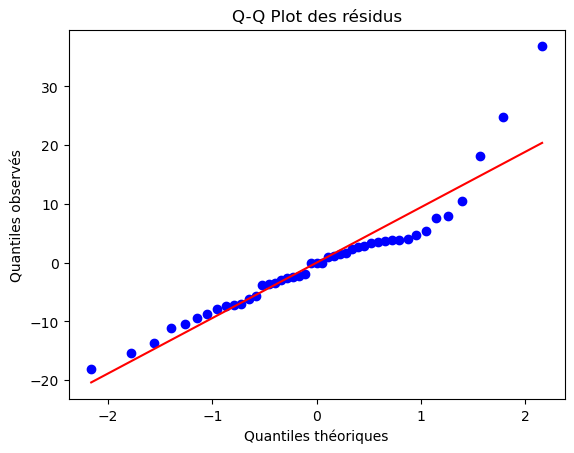

P-valeur : 0.0007319269538743747
Les r√©sidus suivent une distribution normale (p < 0.05).


In [61]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Charger les donn√©es nettoy√©es
data = pd.read_csv("data_cleaned.csv")

# Construire le mod√®le ANOVA
model = ols("Taux_mortalite_infantile ~ C(Acces_eau_potable_categorise) + C(Niveau_de_developpement) + C(Acces_eau_potable_categorise):C(Niveau_de_developpement)", data=data).fit()

# Extraire les r√©sidus
residuals = model.resid

# Cr√©ation du Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot des r√©sidus")  # Titre en fran√ßais
plt.xlabel("Quantiles th√©oriques")  # Label de l'axe des abscisses
plt.ylabel("Quantiles observ√©s")    # Label de l'axe des ordonn√©es
plt.show()

# V√©rification de la normalit√© des r√©sidus

shapiro_test = stats.shapiro(residuals)
print("P-valeur :", shapiro_test.pvalue)

if shapiro_test.pvalue < 0.05:
    print("Les r√©sidus suivent une distribution normale (p < 0.05).")
else:
    print("Les r√©sidus ne suivent pas une distribution normale (p >= 0.05).")


 le graphique de normalit√© des r√©sidus compare les quantiles observ√©s aux quantiles d'une distribution normale th√©orique.

 les points bleus s'alignent sur la ligne rouge, cela indique que les r√©sidus suivent une distribution normale

In [76]:
# Pr√©parer les donn√©es pour l'ANOVA
anova_data = data[['Acces_eau_potable_categorise', 'Niveau_de_developpement', 'Taux_mortalite_infantile']].dropna()

# Ajuster le mod√®le ANOVA avec interaction
model = ols(
    'Taux_mortalite_infantile ~ C(Acces_eau_potable_categorise) + C(Niveau_de_developpement) + C(Acces_eau_potable_categorise):C(Niveau_de_developpement)', 
    data=anova_data
).fit()

# G√©n√©rer le tableau ANOVA
# anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher le tableau ANOVA
# print("\nTableau ANOVA :")
# print(anova_table)

### Tableau ANOVA

| Source de variation                                | Sum of Square- sc S) | df  | F-statistic       | P-value       |
|----------------------------------------------------|----------------------|------|-------------------|---------------|
| Acc√®s √† l'eau potable (`Acces_eau_potable_categorise`) | 5 177.134            | 2    | 24.09532          | 0.000017      |
| Niveau de d√©veloppement (`Niveau_de_developpement`)  | 2.376e-12            | 2    | 1.105773e-14      | 1.000000      |
| Interaction : Acc√®s √† l'eau potable √ó Niveau de d√©veloppement | 4 732.360            | 4    | 11.01263          | 0.000022      |
| R√©sidus                                            | 4 189.781            | 39   | -                 | -             |


**Interpr√©tation des r√©sultats** :  
- Effet de l'acc√®s √† l'eau potable :   
L'acc√®s √† l'eau potable a un effet statistiquement significatif sur le taux de mortalit√© infantile (p < 0.05). Cela signifie que les moyennes des taux de mortalit√© infantile diff√®rent entre les groupes d√©finis par les cat√©gories d'acc√®s √† l'eau potable (Faible, Mod√©r√©, √âlev√©). Cela sugg√®re que l'am√©lioration de l'acc√®s √† l'eau potable pourrait jouer un r√¥le important dans la r√©duction de la mortalit√© infantile.
- Effet du niveau de d√©veloppement :  
Le niveau de d√©veloppement √©conomique n'a pas d'effet significatif sur le taux de mortalit√© infantile (p > 0.05). Cela indique que, dans ce mod√®le particulier, les diff√©rences de mortalit√© infantile ne peuvent pas √™tre attribu√©es uniquement au niveau de d√©veloppement √©conomique.
- Interaction entre les deux facteurs :  
L'interaction entre l'acc√®s √† l'eau potable et le niveau de d√©veloppement est statistiquement significative (p < 0.05). Cela signifie que l'effet de l'acc√®s √† l'eau potable sur la mortalit√© infantile varie selon le niveau de d√©veloppement √©conomique. En d'autres termes, l'impact de l'acc√®s √† l'eau potable sur la mortalit√© infantile n'est pas uniforme entre les pays √† diff√©rents niveaux de d√©veloppement. Par exemple, les pays fortement d√©velopp√©s pourraient mieux capitaliser sur un meilleur acc√®s √† l'eau potable que les pays moins d√©velopp√©s.

## Conclusion g√©n√©rale : 
Notre analyse souligne l'importance d'une strat√©gie int√©gr√©e pour am√©liorer la sant√© publique. Les d√©penses en sant√© augmentent l'esp√©rance de vie, mais leur efficacit√© diminue apr√®s avoir satisfait les besoins fondamentaux. Parall√®lement, l'acc√®s √† l'eau potable joue un r√¥le crucial en influen√ßant positivement l'esp√©rance de vie et en r√©duisant significativement la mortalit√© infantile. Ces r√©sultats montrent que la sant√© est li√©e aux infrastructures de base et n√©cessitent des efforts conjoints en mati√®re de sant√©, d'infrastructures et de politiques pour r√©duire les in√©galit√©s et am√©liorer durablement les conditions de vie.